# iPAGE 
https://github.com/goodarzilab/PAGE  

In [4]:
import pandas as pd 

In [64]:
df = pd.read_csv('radar/result.all.txt',sep='\t').loc[:,['name','logFC','p_value']]#.set_index('ensembl')

https://github.com/goodarzilab/server_wiki/tree/main/lab_softwares

In [65]:
%reload_ext rpy2.ipython

In [66]:
%%R -i df -o data
data = df
data[['fdr']] <- sign(data[,'logFC'])*(1-data[,'p_value'])
data <- data[!is.na(data$'fdr'), ]
data <- data[, c('name', 'fdr','logFC','p_value')]

In [96]:
%%time 
data = data.iloc[[int(data[(data.name == gene)].logFC.idxmax()) for gene in set(data.name)],:]

CPU times: user 1min 6s, sys: 0 ns, total: 1min 6s
Wall time: 1min 12s


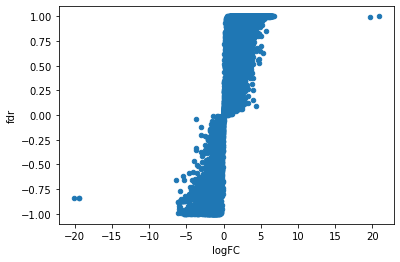

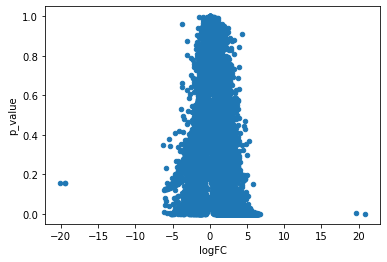

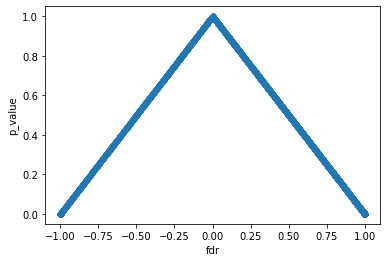

In [101]:
data.plot(x='logFC', y='fdr', kind='scatter')
data.plot(x='logFC', y='p_value', kind='scatter')
data.plot(x='fdr', y='p_value', kind='scatter')
data.to_csv('hl60_delta_mtyl_fdr.txt',sep='\t',index=None, header=None)

# plt.show()

In [105]:
ls ~/Projects/ipage-down

annotations/   goann/         ipage_independence0.sh  LICENSE       scripts/
go2page.ipynb  ipage_down.py  ipage_independence1.sh  __pycache__/  test/


In [ ]:
%%bash 
export PAGEDIR=/data_gilbert/home/aarab/iPAGE

nohup ls *delta_phenotype.txt | parallel -j18 -k bash ~/Projects/ipage-down/ipage_independence1.sh  {} &> ipage.out

%%bash  
ipage_cm='~/GitHub/Abe/my_scripts/ipage_human_ensembl.sh' 
nohup ls hl60_delta_mtyl.txt | parallel -j18 -k bash $ipage_cm {} &> ipage.out &

___
# 

In [1]:
import sys
import pandas as pd 
import numpy as np
from time import time 
from glob import glob
# from itertools import chain
# from functools import reduce
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import subplots
# from venn import venn

# sys.path.append('/rumi/shams/abe/Projects/ipage-down/')
sys.path.append('/data_gilbert/home/aarab/Projects/ipage-msigdb/')

import ipage_down as ipd

In [41]:
def get_c235(parent_path):
    return glob(
        f'{parent_path}/*c5*/pvmatrix.[L-R].txt') + glob(
        f'{parent_path}/*c2.cp*/pvmatrix.[L-R].txt') 
# + glob(
#         f'{parent_path}/*c3*/pvmatrix.[L-R].txt'
#     ) 


In [42]:
pvmat_list = get_c235('hl60_delta_mtyl') 
pvmat_list_fdr = get_c235('hl60_delta_mtyl_fdr')

In [43]:
df = ipd.merge_multiple_pvmat(pvmat_list)

In [44]:
# ipd.style_clean_pvmatrix(df.iloc[:,[0,10]])
df

,[-5.06 -4.14],[-4.14 -3.21],[-3.21 -2.54],[-2.54 -2.03],[-2.03 -1.47],[-1.47 -0.62],[-0.62 1.11],[1.11 1.94],[1.94 2.79],[2.79 4.10],[4.10 5.02]
BIOCARTA_VDR_PATHWAY,-0.299,-0.299,-0.752,-0.299,-0.752,-0.299,-0.752,1.146,0.303,-0.752,4.099
GOMF_WNT_PROTEIN_BINDING,0.272,-0.332,-0.332,-0.332,-0.332,-0.332,-0.332,-0.332,-0.332,1.528,2.466
HP_ABNORMALITY_OF_THE_FORAMEN_MAGNUM,-0.331,1.534,0.273,-0.331,-0.331,-0.331,-0.331,-0.331,-0.331,-0.331,2.437
HP_BIPARIETAL_NARROWING,2.149,-0.283,-1.619,-0.927,0.319,-0.283,1.659,-0.927,1.659,-0.927,-0.921
HP_RENAL_CELL_CARCINOMA,3.092,1.537,0.784,-0.993,0.284,-1.702,0.284,-0.575,-0.993,-0.575,-0.570
WP_PATHWAYS_AFFECTED_IN_ADENOID_CYSTIC_CARCINOMA,2.500,-0.451,-0.256,-0.757,0.352,-1.228,-0.757,-1.228,-0.757,0.352,3.020


### BIOCARTA_VDR_PATHWAY

In [7]:
# ipd.detect_gs_cluster(pvmat_list, gs='BIOCARTA_VDR_PATHWAY')

ipd.read_pvmatrix_killed('hl60_delta_mtyl/msigdb_v7.4_c2.cp.biocarta')['BIOCARTA_VDR_PATHWAY']

['BIOCARTA_PPARA_PATHWAY',
 'BIOCARTA_CARM1_PATHWAY',
 'BIOCARTA_PPARG_PATHWAY',
 'BIOCARTA_CARM_ER_PATHWAY']

In [22]:
ipd.bin_identifier_genes('hl60_delta_mtyl/msigdb_v7.4_c2.cp.biocarta', '10', gs='BIOCARTA_VDR_PATHWAY')

{'BIOCARTA_VDR_PATHWAY': ['BAZ1B',
  'RXRA',
  'NCOA1',
  'CREBBP',
  'EP300',
  'ARID1A',
  'CHAF1A',
  'COPS2']}

### WP_PATHWAYS_AFFECTED_IN_ADENOID_CYSTIC_CARCINOMA

In [48]:
# ipd.detect_gs_cluster(pvmat_list, gs='WP_PATHWAYS_AFFECTED_IN_ADENOID_CYSTIC_CARCINOMA')

ipd.read_pvmatrix_killed('hl60_delta_mtyl/msigdb_v7.4_c2.cp.wikipathways')['WP_PATHWAYS_AFFECTED_IN_ADENOID_CYSTIC_CARCINOMA']

['WP_WNT_SIGNALING_PATHWAY_AND_PLURIPOTENCY',
 'WP_HISTONE_MODIFICATIONS',
 'WP_MIRNA_REGULATION_OF_P53_PATHWAY_IN_PROSTATE_CANCER',
 'WP_SEROTONIN_RECEPTOR_2_AND_ELKSRFGATA4_SIGNALING',
 'WP_TGFBETA_RECEPTOR_SIGNALLING_IN_SKELETAL_DYSPLASIAS',
 'WP_TGFBETA_RECEPTOR_SIGNALING',
 'WP_BLADDER_CANCER',
 'WP_MAPK_PATHWAY_IN_CONGENITAL_THYROID_CANCER',
 'WP_KISSPEPTINKISSPEPTIN_RECEPTOR_SYSTEM_IN_THE_OVARY',
 'WP_MESODERMAL_COMMITMENT_PATHWAY',
 'WP_TYPE_2_PAPILLARY_RENAL_CELL_CARCINOMA',
 'WP_REGULATION_OF_MICROTUBULE_CYTOSKELETON',
 'WP_WNT_SIGNALING_PATHWAY_NETPATH',
 'WP_INHIBITION_OF_EXOSOME_BIOGENESIS_AND_SECRETION_BY_MANUMYCIN_A_IN_CRPC_CELLS',
 'WP_MIRNAS_INVOLVED_IN_DNA_DAMAGE_RESPONSE',
 'WP_IL17_SIGNALING_PATHWAY',
 'WP_EPO_RECEPTOR_SIGNALING']

In [50]:
ipd.bin_identifier_genes('hl60_delta_mtyl/msigdb_v7.4_c2.cp.wikipathways', '0', gs='WP_PATHWAYS_AFFECTED_IN_ADENOID_CYSTIC_CARCINOMA')

{'WP_PATHWAYS_AFFECTED_IN_ADENOID_CYSTIC_CARCINOMA': ['KMT2C',
  'FBXW7',
  'BCOR',
  'ATRX',
  'BCORL1',
  'PTEN',
  'NOTCH1',
  'ATM',
  'ARID5B',
  'PIK3CA',
  'ARID4B']}

### ...

In [124]:
df_fdr = ipd.merge_multiple_pvmat(pvmat_list_fdr)

In [123]:
# ipd.style_clean_pvmatrix(df_fdr.iloc[:,[0,10]])

In [8]:
set(df.index).intersection(set(df_fdr.index))

{'MIR3064_3P',
 'MIR3925_3P',
 'WP_PATHWAYS_AFFECTED_IN_ADENOID_CYSTIC_CARCINOMA'}

In [9]:
# df.loc[set(df.index).intersection(set(df_fdr.index)),]

In [10]:
# df_fdr.loc[set(df.index).intersection(set(df_fdr.index)),]

In [78]:
ipd.detect_gs_cluster(pvmat_list, gs='WP_PATHWAYS_AFFECTED_IN_ADENOID_CYSTIC_CARCINOMA')

['hl60_delta_mtyl/msigdb_v7.4_c2.all/pvmatrix.L.txt',
 'hl60_delta_mtyl/msigdb_v7.4_c2.all/pvmatrix.R.txt',
 'hl60_delta_mtyl/msigdb_v7.4_c2.cp/pvmatrix.L.txt',
 'hl60_delta_mtyl/msigdb_v7.4_c2.cp/pvmatrix.R.txt',
 'hl60_delta_mtyl/msigdb_v7.4_c2.cp.wikipathways/pvmatrix.L.txt',
 'hl60_delta_mtyl/msigdb_v7.4_c2.cp.wikipathways/pvmatrix.R.txt']

### MIR3064_3P

In [34]:
# ipd.detect_gs_cluster(pvmat_list, gs='MIR3064_3P')

ipd.read_pvmatrix_killed('hl60_delta_mtyl/msigdb_v7.4_c3.all')['MIR3064_3P']

['MIR3925_3P',
 'MIR1260A_MIR1260B',
 'MIR6781_3P',
 'ATAACCT_MIR154',
 'MIR3914',
 'MIR12121',
 'MIR4484',
 'MIR135A_2_3P',
 'MIR135B_3P',
 'MIR6500_3P',
 'MIR3622A_3P_MIR3622B_3P',
 'MIR1257',
 'MIR1202',
 'MIR199A_5P',
 'MIR199B_5P']

### MIR3925_3P

In [35]:
# ipd.detect_gs_cluster(pvmat_list, gs='MIR3925_3P')

ipd.read_pvmatrix_killed('hl60_delta_mtyl/msigdb_v7.4_c3.mir')['MIR3925_3P']

['MIR3064_3P',
 'MIR1260A_MIR1260B',
 'MIR135A_2_3P',
 'MIR135B_3P',
 'MIR12121',
 'MIR6500_3P',
 'MIR199B_5P',
 'MIR199A_5P',
 'MIR513C_5P',
 'MIR514B_5P']

In [51]:
ipd.bin_identifier_genes('hl60_delta_mtyl/msigdb_v7.4_c3.mir', '0', gs='MIR3925_3P')

{'MIR3925_3P': ['FLAD1',
  'MEIS2',
  'MARCKS',
  'NFE2L1',
  'ZNF773',
  'MAP3K3',
  'ZNF544',
  'C22orf46',
  'ZNF273',
  'ZNF85',
  'ZNF254',
  'ZNF611',
  'ZNF888',
  'ZNF765',
  'ZNF714',
  'ZNF117',
  'UBXN4',
  'ZNF816',
  'CELF2',
  'ZNF578',
  'ZNF514']}

___
# 

In [37]:
!date

Mon Jan  3 15:13:38 PST 2022
